In [14]:
%run ../Funciones_auxiliares/Funciones_auxiliares.ipynb

## Una imagen es una matriz

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

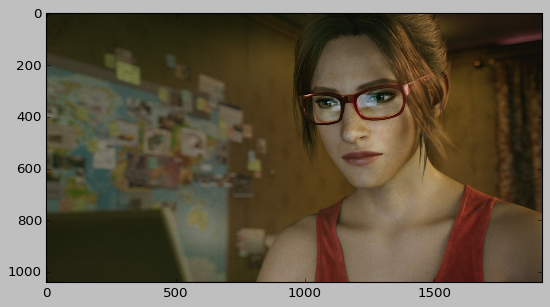

In [16]:
# Definimos el estilo de las gráficas
plt.style.use('classic')
# Leer la imagen
imagen = Image.open('../Images/Claire.jpg')
# Mostar la imagen
plt.imshow(imagen);

In [17]:
# Convertimos la imagen a escala de grises
imagen_gr = imagen.convert('LA')
# Convertimos la imagen a un array de numpy
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
imagen_mat

array([27., 27., 28., ..., 64., 64., 65.])

In [18]:
# Redimensionamos la matriz
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
imagen_mat

array([[27., 27., 28., ..., 20., 20., 20.],
       [28., 28., 28., ..., 20., 20., 20.],
       [30., 29., 28., ..., 20., 20., 20.],
       ...,
       [32., 32., 32., ..., 63., 64., 65.],
       [32., 32., 32., ..., 64., 64., 65.],
       [32., 32., 32., ..., 64., 64., 65.]])

In [19]:
# Mostramos las dimensiones de la matriz
imagen_mat.shape

(1038, 1920)

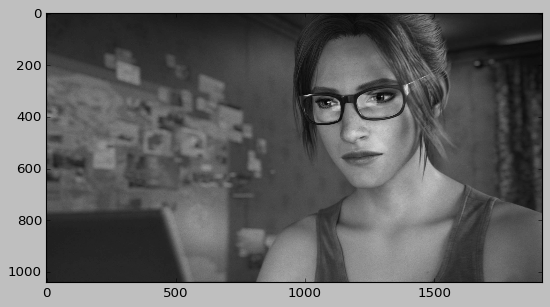

In [20]:
# Mostramos la imagen
plt.imshow(imagen_mat, cmap='gray');

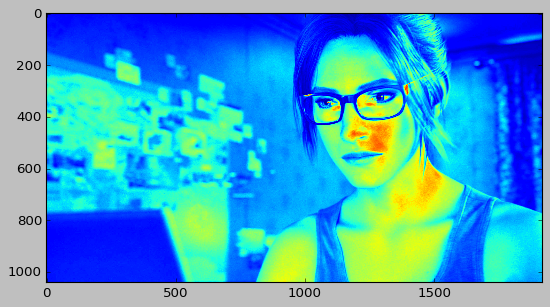

In [21]:
# Modificamos la matriz
imagen_mat_2 = imagen_mat / 10
plt.imshow(imagen_mat_2);

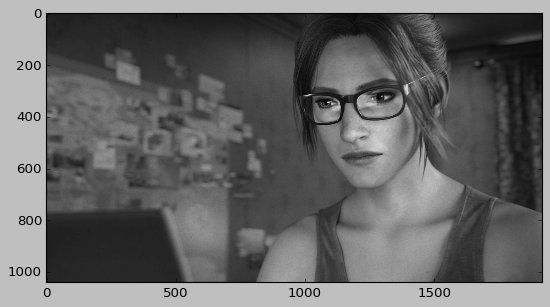

In [22]:
plt.imshow(imagen_mat_2, cmap='gray');

## Apliquemos la descomposición SVD a una imagen

In [23]:
# Aplicamos la descomposición SVD
U, S, V = np.linalg.svd(imagen_mat)

In [24]:
# Mostramos las dimensiones de las matrices
print(f'''
Dimensiones de la matriz original: {imagen_mat.shape}
Dimensiones de la matriz U: {U.shape}
Dimensiones de la matriz S: {S.shape}
Dimensiones de la matriz V: {V.shape}
    ''')


Dimensiones de la matriz original: (1038, 1920)
Dimensiones de la matriz U: (1038, 1038)
Dimensiones de la matriz S: (1038,)
Dimensiones de la matriz V: (1920, 1920)
    


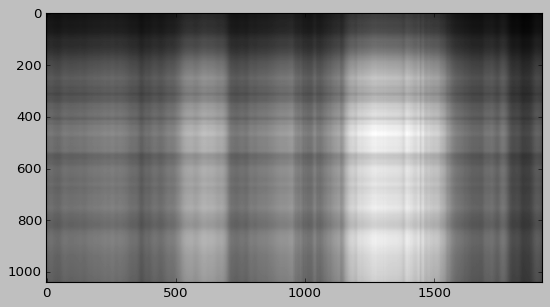

In [25]:
# Veamos que obtenemos si utilizamos solo la primera columna
imagen_recons = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(V[:1, :])
plt.imshow(imagen_recons, cmap='gray');

## Buscando la cantidad de valores singulares que nos sirvan

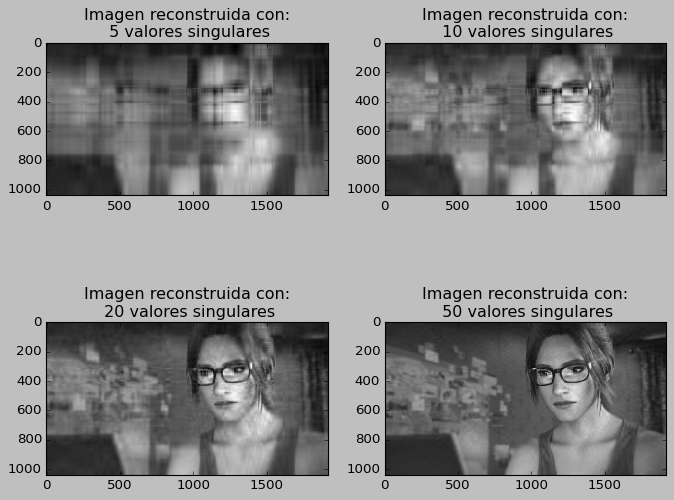

In [26]:
# creamos una figura para mostrar las imágenes
fig = plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
mostrarImagen(U, S, V, n=5)
plt.subplot(2, 2, 2)
mostrarImagen(U, S, V, n=10)
plt.subplot(2, 2, 3)
mostrarImagen(U, S, V, n=20)
plt.subplot(2, 2, 4)
mostrarImagen(U, S, V, n=50)

## ¿Qué es una pseudoinversa de Moore Penrose y cómo calcularla?

In [27]:
np.set_printoptions(suppress=True)
# creamos una matriz
A = np.random.randint(0, 10, (3, 2))
A

array([[1, 5],
       [6, 2],
       [1, 4]])

In [33]:
# Calculamos la descomposición SVD
U, S, V = np.linalg.svd(A)
print(f'''
Matriz original:
{A}
Matriz U:
{U}
Matriz S:
{S}
Matriz V:
{V}
    ''')


Matriz original:
[[1 5]
 [6 2]
 [1 4]]
Matriz U:
[[-0.56303365  0.5491725  -0.61757808]
 [-0.6820159  -0.7307984  -0.02807173]
 [-0.46674129  0.40539274  0.78600846]]
Matriz S:
[7.92399324 4.49559019]
Matriz V:
[[-0.6463749  -0.76301998]
 [-0.76301998  0.6463749 ]]
    


In [38]:
# Calculemos la pseudoinversa de A de forma manual
# Primero calculamos la matriz S_pse
S_pse = np.zeros((A.shape[0], A.shape[1])).T # Creamos una matriz de ceros con las dimensiones de A
S_pse[:A.shape[1], :A.shape[1]] = np.diag(1.0 / S) # Añadimos la diagonal de la inversa de S
# Calculamos la pseudoinversa
A_pse = V.T @ S_pse @ U.T
A_pse

array([[-0.04728132,  0.17966903, -0.03073286],
       [ 0.13317573, -0.0394011 ,  0.10323089]])

In [39]:
# Calculamos la pseudoinversa de A con la función de numpy
A_pse_np = np.linalg.pinv(A)
A_pse_np

array([[-0.04728132,  0.17966903, -0.03073286],
       [ 0.13317573, -0.0394011 ,  0.10323089]])

In [41]:
# Verificamos que sea la pseudoinversa
A_pse @ A

array([[1., 0.],
       [0., 1.]])

In [43]:
# verificamos que sucede si realizamos la aplicación de forma contraria
A @ A_pse

array([[ 0.61859732, -0.01733649,  0.48542159],
       [-0.01733649,  0.99921198,  0.02206462],
       [ 0.48542159,  0.02206462,  0.3821907 ]])

In [44]:
# Otra forma de calcular la pseudoinversa
A_pse_2 = np.linalg.inv(A.T @ A) @ A.T
A_pse_2

array([[-0.04728132,  0.17966903, -0.03073286],
       [ 0.13317573, -0.0394011 ,  0.10323089]])

## Usando la pseudo inversa para resolver un sistema sobredeterminando

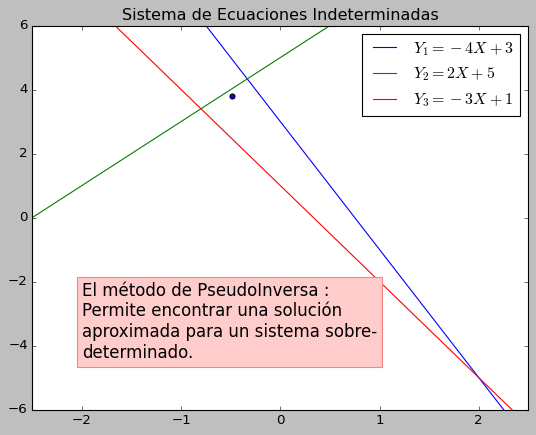

In [45]:
X = np.linspace(-5,5,1000)

# Texto 
text = ("El método de PseudoInversa :\n"
"Permite encontrar una solución\n"
"aproximada para un sistema sobre-\n"
"determinado.")

# Sistema Sobredeterminado
Y1 = -4*X + 3
Y2 = 2*X + 5
Y3 = -3*X + 1

# Resultado
M2 = np.array([[4,1],[-2,1],[3,1]])
VS = np.array([[3,5,1]]).T
M2I = np.linalg.pinv(M2)
VR = M2I.dot(VS)

# Graficando Sistema de Ecuaciones
plt.title('Sistema de Ecuaciones Indeterminadas') 
plt.plot(X,Y1, label= r'$Y_{1} = -4X + 3$')
plt.plot(X,Y2, label= r'$Y_{2} = 2X + 5$')
plt.plot(X,Y3, label= r'$Y_{3} = -3X + 1$')
plt.scatter(VR[0],VR[1])
plt.text(-2, -2, text, size=15,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.xlim(-2.5,2.5)
plt.ylim(-6,6)
plt.legend()
plt.show()